# **K-Vecinos más cercanos**

```
Autor : Luis Beltran Palma Ttito
Lugar : Cusco, Perú, 2023.
Proposito : K-NN en la clasificación de digitos manuscritos
```

# **1. PASO PREVIO**

## Importacion de librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
# Librería: scikit learn, "sklearn"
# Módulo train_test_split: separación de datos para entrenamiento y test
from sklearn.model_selection import train_test_split
# Módulo KNeighborsClassifier: Implementa K-NN para clasificación
from sklearn.neighbors import KNeighborsClassifier
# Módulo classification_report: Métricas
from sklearn.metrics import classification_report
# Módulo accuracy_score: metrica de exactitud
from sklearn.metrics import accuracy_score
# Módulo confusion_matrix: matriz de confusión
from sklearn.metrics import confusion_matrix

## Importación de datos

In [13]:
datos = pd.read_csv("./digito16x16.csv", sep=',', header=0)
# muestras los primero 5 valores
datos.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p248,p249,p250,p251,p252,p253,p254,p255,p256,digito
0,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,1,1,1,...,1,1,1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Distribución de clases

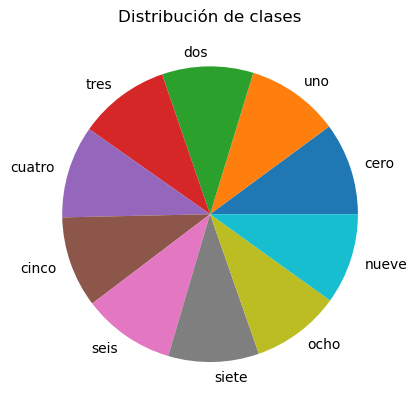

In [14]:
distribucion = datos.groupby('digito').size()
plt.pie(distribucion, labels = ['cero','uno','dos', 'tres','cuatro','cinco','seis', 'siete', 'ocho', 'nueve'])
plt.title('Distribución de clases')
plt.show()

## Visualización de datos

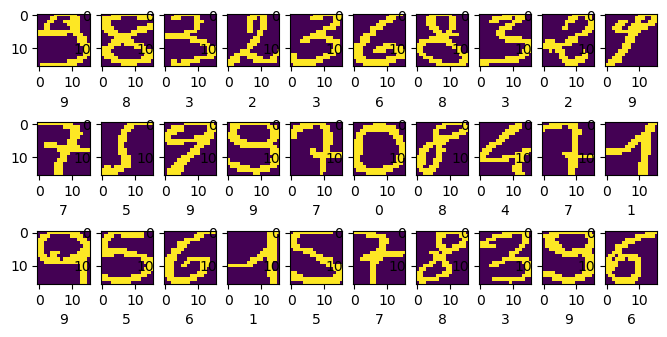

In [15]:
X = datos.drop(['digito'], axis=1)
y = datos['digito']
ran = datos.shape[0]-1
fig, ax = plt.subplots(3, 10, figsize=(8,4))
for k in range(3):
    for j in range(10):
        azar = random.sample(range(ran),1)
        img = np.array(X.iloc[azar].values)
        img = np.array(img).reshape(16,16)
        ax[k,j].imshow(img)
        ax[k,j].set_xlabel(y[azar[0]])
plt.show()

## **2. SEPARACIÓN DE DATOS PARA TRAINING Y TESTING**

In [16]:
# Sparación de datos en entrada y salida
X = datos.drop(['digito'], axis=1)
y = datos['digito']
# Sparación de datos para entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.30, random_state=13)

# **3. ENTRENAMIENTO Y TEST KNN**

In [18]:
# Definición del modelo
Modelo = KNeighborsClassifier(n_neighbors = 1)
# Entrenamiento del modelo
Modelo.fit(X_train, y_train)
# Test del modelo
Exactitud = Modelo.score(X_test, y_test)
print('Exactitud de K-NN, k=7, :', Exactitud)

Exactitud de K-NN, k=7, : 0.9184100418410042


## Matriz de confusión y exactitud

In [19]:
# Test del modelo
pred = Modelo.predict(X_test)
# Matriz de confusión
matriz = confusion_matrix(y_test, pred)
print(matriz)

[[49  0  0  0  0  0  1  0  0  0]
 [ 0 55  0  0  1  0  0  1  0  0]
 [ 0  0 45  1  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  0  1]
 [ 0  5  0  0 48  0  1  0  0  1]
 [ 0  0  0  1  0 44  2  0  0  1]
 [ 1  0  0  0  0  1 45  0  0  0]
 [ 0  3  1  0  0  0  1 43  0  0]
 [ 0  1  7  3  0  0  0  0 35  0]
 [ 0  2  0  0  0  2  0  0  1 32]]


<Axes: >

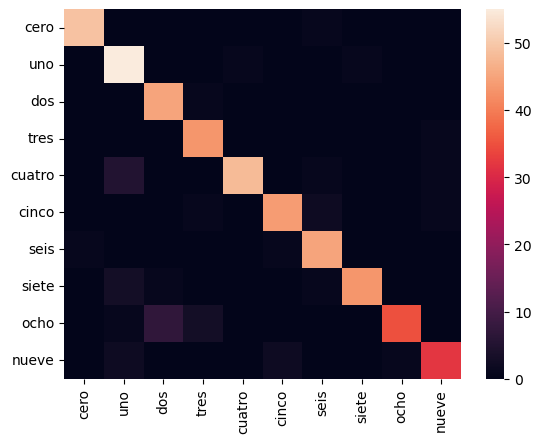

In [20]:
categorias = ['cero','uno','dos', 'tres','cuatro','cinco','seis','siete','ocho','nueve']
sns.heatmap(matriz, yticklabels=categorias, xticklabels=categorias)

In [21]:
from sklearn.metrics import accuracy_score
# Calculo de acurracy (exactitud)
accuracy = accuracy_score(y_test, pred)
print('Exactitud: ',accuracy)

Exactitud:  0.9184100418410042


# **4. PREDICCIÓN DE NUEVOS CASOS**

In [22]:
nuevo = np.array([[0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,
                    0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,
                    0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,
                    0,0,0,0,0,1,1,1,1,0,1,1,1,0,0,0,
                    0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,
                    0,0,0,1,1,1,0,1,0,1,1,1,1,0,0,0,
                    0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,
                    0,0,1,1,0,0,0,0,0,1,1,1,1,0,0,0,
                    0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,
                    0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,
                    0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,
                    0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,
                    0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,
                    0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,
                    0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,
                    0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0]])

In [23]:
y_pred = Modelo.predict(nuevo)
print(y_pred[0])

1
